In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
data.shape

(7613, 5)

In [6]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
data=data.iloc[:,[0,3,4]]
test_data=test_data.iloc[:,[0,3]]

In [8]:
test_data

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,Storm in RI worse than last hurricane. My city...
3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [9]:
data.isna().sum()

id        0
text      0
target    0
dtype: int64

In [10]:
import regex as re

In [11]:
data.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
def remove_pattern(text,pattern):
    x=re.findall(pattern,text)
    for i in x:
        text=re.sub(i,'',text)
    return text

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
data['tokenized']=[word_tokenize(x) for x in data['text'] ]
test_data['tokenized']=[word_tokenize(x) for x in test_data['text'] ]
data.head()

,id,text,target,tokenized
0,1,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #, ea..."
1,4,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, ., Canada]"
2,5,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac..."
3,6,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #, wildfires, evacua..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #, ..."


In [15]:
from nltk.stem import WordNetLemmatizer

In [16]:
lem=WordNetLemmatizer()

In [17]:
data['tokenized']=data['tokenized'].apply(lambda x: [lem.lemmatize(i) for i in x])
test_data['tokenized']=test_data['tokenized'].apply(lambda x: [lem.lemmatize(i) for i in x])
data.head()

,id,text,target,tokenized
0,1,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #, ea..."
1,4,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, ., Canada]"
2,5,All residents asked to 'shelter in place' are ...,1,"[All, resident, asked, to, 'shelter, in, place..."
3,6,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #, wildfire, evacuat..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #, ..."


In [18]:
from string import punctuation
from nltk.corpus import stopwords

In [19]:
num=[1,2,3,4,5,6,7,8,9,0]
stops=list(stopwords.words('english'))+list(punctuation)+list(num)
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
data['tokenized']= data['tokenized'].apply(lambda x:[i for i in x if i not in stops])
test_data['tokenized']= test_data['tokenized'].apply(lambda x:[i for i in x if i not in stops])
data.head()

,id,text,target,tokenized
0,1,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, Reason, earthquake, May, ALLAH, F..."
1,4,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask, Canada]"
2,5,All residents asked to 'shelter in place' are ...,1,"[All, resident, asked, 'shelter, place, notifi..."
3,6,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, wildfire, evacuation..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, photo, Ruby, Alaska, smoke, ..."


In [21]:
data['tokenized']=data['tokenized'].apply(lambda x: [i.lower() for i in x])
test_data['tokenized']=test_data['tokenized'].apply(lambda x: [i.lower() for i in x])

In [22]:
data['tokenized']=data['tokenized'].apply(lambda x: ' '.join(x))
test_data['tokenized']=test_data['tokenized'].apply(lambda x: ' '.join(x))

In [23]:
data.head()

,id,text,target,tokenized
0,1,Our Deeds are the Reason of this #earthquake M...,1,our deeds reason earthquake may allah forgive u
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,all resident asked 'shelter place notified off...
3,6,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive wildfire evacuation orde..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,just got sent photo ruby alaska smoke wildfire...


In [24]:
all_word=' '.join(data['tokenized'])

In [25]:
all_word

"our deeds reason earthquake may allah forgive u forest fire near la ronge sask canada all resident asked 'shelter place notified officer no evacuation shelter place order expected 13,000 people receive wildfire evacuation order california just got sent photo ruby alaska smoke wildfire pours school rockyfire update california hwy 20 closed direction due lake county fire cafire wildfire flood disaster heavy rain cause flash flooding street manitou colorado springs area i 'm top hill i see fire wood ... there 's emergency evacuation happening building across street i 'm afraid tornado coming area ... three people died heat wave far haha south tampa getting flooded hah- wait a second i live in south tampa what am i gon na do what am i gon na do fvck flooding raining flooding florida tampabay tampa 18 19 day i 've lost count flood bago myanmar we arrived bago damage school bus 80 multi car crash breaking what 's man i love fruit summer lovely my car fast what goooooooaaaaaal ridiculous ...

In [26]:
data['tokenized']=data['tokenized'].apply(lambda x: remove_pattern(x,'http[\w]*'))
test_data['tokenized']=test_data['tokenized'].apply(lambda x: remove_pattern(x,'http[\w]*'))

In [27]:
data['tokenized']=data['tokenized'].apply(lambda x: remove_pattern(x,'//t.co/[\w]*'))
test_data['tokenized']=test_data['tokenized'].apply(lambda x: remove_pattern(x,'//t.co/[\w]*'))

In [28]:
all_word1=' '.join(data['tokenized'])
all_word1

"our deeds reason earthquake may allah forgive u forest fire near la ronge sask canada all resident asked 'shelter place notified officer no evacuation shelter place order expected 13,000 people receive wildfire evacuation order california just got sent photo ruby alaska smoke wildfire pours school rockyfire update california hwy 20 closed direction due lake county fire cafire wildfire flood disaster heavy rain cause flash flooding street manitou colorado springs area i 'm top hill i see fire wood ... there 's emergency evacuation happening building across street i 'm afraid tornado coming area ... three people died heat wave far haha south tampa getting flooded hah- wait a second i live in south tampa what am i gon na do what am i gon na do fvck flooding raining flooding florida tampabay tampa 18 19 day i 've lost count flood bago myanmar we arrived bago damage school bus 80 multi car crash breaking what 's man i love fruit summer lovely my car fast what goooooooaaaaaal ridiculous ...

In [29]:
data['tokenized']=data['tokenized'].apply(lambda x:remove_pattern(x,'\x89[\w]*'))
test_data['tokenized']=test_data['tokenized'].apply(lambda x:remove_pattern(x,'\x89Û[\w]*'))

In [30]:
data['tokenized']=data['tokenized'].apply(lambda x:remove_pattern(x,'[0-9][\w]*'))
test_data['tokenized']=test_data['tokenized'].apply(lambda x:remove_pattern(x,'[0-9][\w]*'))

In [31]:
data['tokenized']=data['tokenized'].apply(lambda x:remove_pattern(x,'[.,/:-][\w]*'))
test_data['tokenized']=test_data['tokenized'].apply(lambda x:remove_pattern(x,'[0-9][\w]*'))

In [32]:
all_word2=' '.join(data['tokenized'])
all_word2

"our deeds reason earthquake may allah forgive u forest fire near la ronge sask canada all resident asked 'shelter place notified officer no evacuation shelter place order expected  people receive wildfire evacuation order california just got sent photo ruby alaska smoke wildfire pours school rockyfire update california hwy  closed direction due lake county fire cafire wildfire flood disaster heavy rain cause flash flooding street manitou colorado springs area  there 's emergency evacuation happening building across street  three people died heat wave far haha south tampa getting flooded hah wait a second i live in south tampa what am i gon na do what am i gon na do fvck flooding raining flooding florida tampabay tampa   day i 've lost count flood bago myanmar we arrived bago damage school bus  multi car crash breaking what 's man i love fruit summer lovely my car fast what goooooooaaaaaal  london cool love skiing what wonderful day looooool  was nyc last week love girlfriend cooool do

In [33]:
data['tokenized']=data['tokenized'].apply(lambda x:remove_pattern(x,'[ª¢][\w]*'))
test_data['tokenized']=test_data['tokenized'].apply(lambda x:remove_pattern(x,'[ª¢][\w]*'))

In [34]:
all_word3=' '.join(data['tokenized'])
all_word3

"our deeds reason earthquake may allah forgive u forest fire near la ronge sask canada all resident asked 'shelter place notified officer no evacuation shelter place order expected  people receive wildfire evacuation order california just got sent photo ruby alaska smoke wildfire pours school rockyfire update california hwy  closed direction due lake county fire cafire wildfire flood disaster heavy rain cause flash flooding street manitou colorado springs area  there 's emergency evacuation happening building across street  three people died heat wave far haha south tampa getting flooded hah wait a second i live in south tampa what am i gon na do what am i gon na do fvck flooding raining flooding florida tampabay tampa   day i 've lost count flood bago myanmar we arrived bago damage school bus  multi car crash breaking what 's man i love fruit summer lovely my car fast what goooooooaaaaaal  london cool love skiing what wonderful day looooool  was nyc last week love girlfriend cooool do

In [35]:
data.head()

,id,text,target,tokenized
0,1,Our Deeds are the Reason of this #earthquake M...,1,our deeds reason earthquake may allah forgive u
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,all resident asked 'shelter place notified off...
3,6,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order cali...
4,7,Just got sent this photo from Ruby #Alaska as ...,1,just got sent photo ruby alaska smoke wildfire...


In [36]:
data1=data.drop('text',axis=1)
test_data=test_data.drop('text',axis=1)

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [38]:
wordcloud=WordCloud(width=400,height=300,random_state=42,max_font_size=100).generate(all_word3)

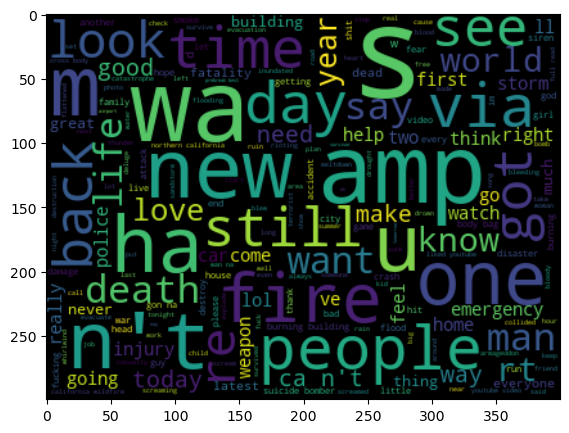

In [39]:
plt.figure(figsize=(20,5))
plt.imshow(wordcloud,interpolation='bilinear')

In [40]:
neg=''.join([x for x in data1['tokenized'][data1['target']==1]])

In [41]:
neg

"our deeds reason earthquake may allah forgive uforest fire near la ronge sask canadaall resident asked 'shelter place notified officer no evacuation shelter place order expected people receive wildfire evacuation order californiajust got sent photo ruby alaska smoke wildfire pours schoolrockyfire update california hwy  closed direction due lake county fire cafire wildfireflood disaster heavy rain cause flash flooding street manitou colorado springs areathere 's emergency evacuation happening building across streetthree people died heat wave farhaha south tampa getting flooded hah wait a second i live in south tampa what am i gon na do what am i gon na do fvck floodingraining flooding florida tampabay tampa   day i 've lost countflood bago myanmar we arrived bagodamage school bus  multi car crash breakingbbcmtd wholesale markets ablaze  africanbaze breaking news nigeria flag set ablaze aba  inec office abia set ablaze  how west wa burned thousands wildfire ablaze california alone  depu

In [42]:
negword=WordCloud(width=400,height=300,random_state=42,max_font_size=100).generate(neg)

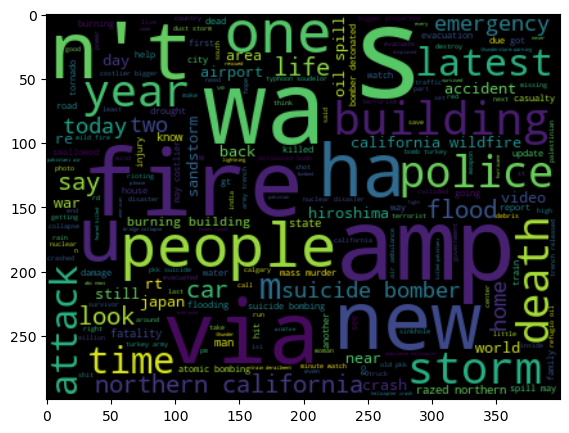

In [43]:
plt.figure(figsize=(20,5))
plt.imshow(negword,interpolation='bilinear')

In [44]:
pos=''.join([x for x in data1['tokenized'][data1['target']==0]])

In [45]:
pos=WordCloud(width=400,height=300,random_state=42,max_font_size=100).generate(pos)

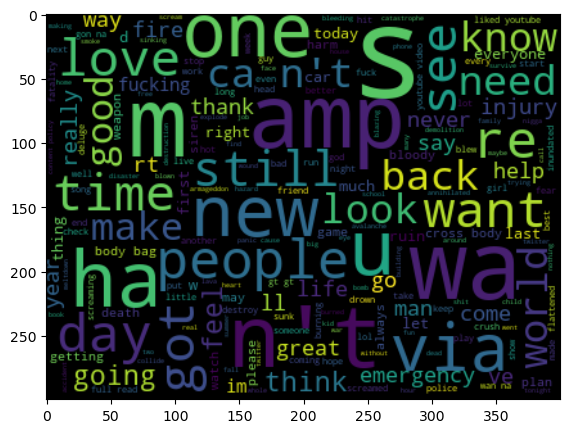

In [46]:
plt.figure(figsize=(20,5))
plt.imshow(pos,interpolation='bilinear')

## CountVector

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
cv=CountVectorizer()

In [49]:
v1=cv.fit_transform(data1['tokenized'])
test_v1=cv.transform(test_data['tokenized'])

## LogisticRegression

In [50]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
sm=SMOTE()

In [52]:
x=v1
y=data1['target']
x_val=test_v1

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [54]:
y_train.value_counts()

0    2896
1    2204
Name: target, dtype: int64

In [55]:
x_train,y_train=sm.fit_resample(x_train,y_train)

In [56]:
y_train.value_counts()

0    2896
1    2896
Name: target, dtype: int64

In [57]:
lr=LogisticRegression()
model=lr.fit(x_train,y_train)

In [58]:
model.score(x_train,y_train)

0.9135013812154696

In [59]:
model.score(x_test,y_test)

0.7190608834062873

In [60]:
y_pred=model.predict(x_test)

In [61]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.66      0.81      0.73      1178
           1       0.79      0.64      0.71      1335

    accuracy                           0.72      2513
   macro avg       0.73      0.72      0.72      2513
weighted avg       0.73      0.72      0.72      2513



In [62]:
confusion_matrix(y_pred,y_test)

array([[959, 219],
       [487, 848]], dtype=int64)

#### 72

## RidgeClassifier

In [63]:
from sklearn.linear_model import RidgeClassifier

In [64]:
rc=RidgeClassifier(alpha=19)
modelr=rc.fit(x_train,y_train)
modelr.score(x_train,y_train)

0.8732734806629834

In [65]:
modelr.score(x_test,y_test)

0.7174691603660963

In [66]:
y_pred=modelr.predict(x_test)

In [67]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.65      0.82      0.73      1158
           1       0.80      0.63      0.71      1355

    accuracy                           0.72      2513
   macro avg       0.73      0.72      0.72      2513
weighted avg       0.73      0.72      0.72      2513



#### 72

## DecisionTree

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [69]:
dt=DecisionTreeClassifier(max_depth=98)
# para={'max_depth':range(1,100)}
# gv=GridSearchCV(dt,param_grid=para,cv=5)
model1=dt.fit(x_train,y_train)

In [70]:
model1.score(x_train,y_train)

0.7871201657458563

In [71]:
model1.score(x_test,y_test)

0.6155988857938719

In [72]:
y_pred=model1.predict(x_test)

In [73]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.46      0.78      0.58       846
           1       0.83      0.53      0.65      1667

    accuracy                           0.62      2513
   macro avg       0.64      0.66      0.61      2513
weighted avg       0.70      0.62      0.62      2513



In [74]:
confusion_matrix(y_pred,y_test)

array([[663, 183],
       [783, 884]], dtype=int64)

#### 62

## RandomForest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf=RandomForestClassifier(n_estimators=150,bootstrap=True)
# para={'n_estimators':range(50,200)}
# gv=GridSearchCV(rf,param_grid=para,cv=5)
model2=rf.fit(x_train,y_train)
model2.score(x_train,y_train)

0.9307665745856354

In [77]:
model2.score(x_test,y_test)

0.7047353760445683

In [78]:
y_pred=model2.predict(x_test)

In [79]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1274
           1       0.73      0.63      0.68      1239

    accuracy                           0.70      2513
   macro avg       0.71      0.70      0.70      2513
weighted avg       0.71      0.70      0.70      2513



In [80]:
confusion_matrix(y_pred,y_test)

array([[989, 285],
       [457, 782]], dtype=int64)

####  70

In [81]:
y_test.value_counts()

0    1446
1    1067
Name: target, dtype: int64

## KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
kn=KNeighborsClassifier()
para={'n_neighbors':range(1,10)}
gv=GridSearchCV(kn,param_grid=para,cv=10)
model3=gv.fit(x_train,y_train)

In [84]:
model3.best_score_

0.5833997379548568

In [85]:
model3.best_params_

{'n_neighbors': 4}

In [86]:
model3.score(x_train,y_train)

0.631560773480663

In [87]:
model3.score(x_test,y_test)

0.6120175089534421

In [88]:
y_pred=model3.predict(x_test)

In [89]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.61      0.72      2057
           1       0.26      0.60      0.36       456

    accuracy                           0.61      2513
   macro avg       0.57      0.61      0.54      2513
weighted avg       0.76      0.61      0.66      2513



#### 64

## NaiveBayes

In [90]:
from sklearn.naive_bayes import MultinomialNB

In [91]:
nb=MultinomialNB(alpha=2.8)
model4=nb.fit(x_train,y_train)

In [92]:
model4.score(x_train,y_train)

0.7348066298342542

In [93]:
model4.score(x_test,y_test)

0.7278153601273378

In [94]:
y_pred=model4.predict(x_test)

In [95]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1706
           1       0.56      0.74      0.64       807

    accuracy                           0.73      2513
   macro avg       0.71      0.73      0.71      2513
weighted avg       0.76      0.73      0.74      2513



In [96]:
confusion_matrix(y_pred,y_test)

array([[1234,  472],
       [ 212,  595]], dtype=int64)

In [97]:
y_test.value_counts()

0    1446
1    1067
Name: target, dtype: int64

#### 73

## SVM

In [98]:
from sklearn.svm import SVC

In [99]:
svm=SVC(C=2.3,kernel='rbf',random_state=42)
model5=svm.fit(x_train,y_train)

In [100]:
model5.score(x_train,y_train)

0.924378453038674

In [101]:
model5.score(x_test,y_test)

0.7011539992041385

In [102]:
y_pred=model5.predict(x_test)

In [103]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1367
           1       0.69      0.64      0.66      1146

    accuracy                           0.70      2513
   macro avg       0.70      0.70      0.70      2513
weighted avg       0.70      0.70      0.70      2513



In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
confusion_matrix(y_pred,y_test)

array([[1031,  336],
       [ 415,  731]], dtype=int64)

In [106]:
y_test.value_counts()

0    1446
1    1067
Name: target, dtype: int64

#### 70

In [107]:
from sklearn.ensemble import AdaBoostClassifier

In [108]:
adc=AdaBoostClassifier(base_estimator=dt,n_estimators=100,learning_rate=0.8)
model6=adc.fit(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [109]:
model6.score(x_train,y_train)

0.9307665745856354

In [110]:
model6.score(x_test,y_test)

0.7039395145244728

In [111]:
y_pred=model6.predict(x_test)

In [112]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      1260
           1       0.74      0.63      0.68      1253

    accuracy                           0.70      2513
   macro avg       0.71      0.70      0.70      2513
weighted avg       0.71      0.70      0.70      2513



#### 68

#### using CountVectorizer so after checking all models accuracy and precision and recall i decided to use LogisticRegression model as final model 

# using TF-IDF

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [114]:
tf=TfidfVectorizer()
v2=tf.fit_transform(data1['tokenized'])
test_v2=tf.transform(test_data['tokenized'])

In [115]:
x=v2
y=data1['target']
x_val=test_v2

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [117]:
x_train,y_train=sm.fit_resample(x_train,y_train)

In [118]:
y_train.value_counts()

0    2896
1    2896
Name: target, dtype: int64

## LogisticRegression

In [119]:
lr=LogisticRegression(C=2)
tf_model=lr.fit(x_train,y_train)

In [120]:
tf_model.score(x_train,y_train)

0.8943370165745856

In [121]:
tf_model.score(x_test,y_test)

0.7286112216474333

In [122]:
y_pred=tf_model.predict(x_test)

In [123]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74      1180
           1       0.81      0.64      0.72      1333

    accuracy                           0.73      2513
   macro avg       0.74      0.73      0.73      2513
weighted avg       0.74      0.73      0.73      2513



#### 73

In [124]:
from sklearn.linear_model import RidgeClassifier

In [125]:
rc=RidgeClassifier(alpha=3)
modelr2=rc.fit(x_train,y_train)
modelr2.score(x_train,y_train)

0.8865676795580111

In [126]:
modelr2.score(x_test,y_test)

0.7294070831675289

In [127]:
y_pred=modelr2.predict(x_test)

In [128]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74      1182
           1       0.81      0.65      0.72      1331

    accuracy                           0.73      2513
   macro avg       0.74      0.73      0.73      2513
weighted avg       0.74      0.73      0.73      2513



In [129]:
y_test.value_counts()

0    1446
1    1067
Name: target, dtype: int64

#### 73

## DecisionTree

In [130]:
dt=DecisionTreeClassifier(max_depth=50,criterion='entropy')
tf_model1=dt.fit(x_train,y_train)

In [131]:
tf_model1.score(x_train,y_train)

0.6766229281767956

In [132]:
tf_model1.score(x_test,y_test)

0.6653402307998408

In [133]:
y_pred=tf_model1.predict(x_test)

In [134]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76      2105
           1       0.30      0.78      0.43       408

    accuracy                           0.67      2513
   macro avg       0.62      0.71      0.60      2513
weighted avg       0.83      0.67      0.71      2513



#### 67

## RandomForest

In [135]:
rf=RandomForestClassifier(n_estimators=100,criterion='entropy')
tf_model2=rf.fit(x_train,y_train)
tf_model2.score(x_train,y_train)

0.9307665745856354

In [136]:
tf_model2.score(x_test,y_test)

0.7214484679665738

In [137]:
y_pred=tf_model2.predict(x_test)

In [138]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74      1226
           1       0.78      0.64      0.70      1287

    accuracy                           0.72      2513
   macro avg       0.73      0.72      0.72      2513
weighted avg       0.73      0.72      0.72      2513



#### 72

## KNN

In [139]:
knn=KNeighborsClassifier(n_neighbors=2)
tf_model3=knn.fit(x_train,y_train)
tf_model3.score(x_train,y_train)

0.8413328729281768

In [140]:
tf_model3.score(x_test,y_test)

0.49781138081973736

In [141]:
y_pred=tf_model3.predict(x_test)

In [142]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.36      0.61      0.45       850
           1       0.69      0.44      0.54      1663

    accuracy                           0.50      2513
   macro avg       0.52      0.52      0.49      2513
weighted avg       0.58      0.50      0.51      2513



#### 56

## NaiveBayes

In [143]:
nb=MultinomialNB(alpha=0.8)
para={'alpha':[1,2,3,4,5,6]}
gv=GridSearchCV(nb,param_grid=para,cv=5)
tf_model4=gv.fit(x_train,y_train)
tf_model4.score(x_train,y_train)

0.8214779005524862

In [144]:
tf_model4.best_score_

0.7275505505460755

In [145]:
tf_model4.best_params_

{'alpha': 1}

In [146]:
tf_model4.score(x_test,y_test)

0.7250298448070036

In [147]:
y_pred=tf_model4.predict(x_test)

In [148]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1659
           1       0.58      0.72      0.64       854

    accuracy                           0.73      2513
   macro avg       0.71      0.72      0.71      2513
weighted avg       0.75      0.73      0.73      2513



In [149]:
y_test.value_counts()

0    1446
1    1067
Name: target, dtype: int64

#### 73

## SVM

In [228]:
svm=SVC(C=5,kernel='rbf')
tf_model5=svm.fit(x_train,y_train)
tf_model5.score(x_train,y_train)

0.9307665745856354

In [229]:
tf_model5.score(x_test,y_test)

0.7445284520493434

In [230]:
y_pred=tf_model5.predict(x_test)

In [231]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1514
           1       0.67      0.71      0.69       999

    accuracy                           0.74      2513
   macro avg       0.73      0.74      0.74      2513
weighted avg       0.75      0.74      0.75      2513



In [223]:
y_test.value_counts()

0    1446
1    1067
Name: target, dtype: int64

#### 75 best out of all the models

## AdaBoosting

In [155]:
dt=DecisionTreeClassifier()
abc=AdaBoostClassifier(base_estimator=lr,learning_rate=1,n_estimators=100)
tf_model6=abc.fit(x_train,y_train)
tf_model6.score(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8209599447513812

In [156]:
tf_model6.score(x_test,y_test)

0.7262236370871469

In [157]:
y_pred=tf_model6.predict(x_test)

In [158]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74      1234
           1       0.78      0.65      0.71      1279

    accuracy                           0.73      2513
   macro avg       0.73      0.73      0.73      2513
weighted avg       0.73      0.73      0.72      2513



### 73

In [159]:
from xgboost import XGBClassifier

In [160]:
xgb=XGBClassifier()
tf_xgb_model7=xgb.fit(x_train,y_train)
tf_xgb_model7.score(x_train,y_train)

0.8164709944751382

In [161]:
tf_xgb_model7.score(x_test,y_test)

0.6828491842419419

In [162]:
tf_xgb_pred=tf_xgb_model7.predict(x_test)

In [163]:
print(classification_report(y_test,tf_xgb_pred))

              precision    recall  f1-score   support

           0       0.80      0.60      0.69      1446
           1       0.59      0.80      0.68      1067

    accuracy                           0.68      2513
   macro avg       0.70      0.70      0.68      2513
weighted avg       0.71      0.68      0.68      2513



In [164]:
y_test.value_counts()

0    1446
1    1067
Name: target, dtype: int64

### out of all vectorizer and models we are using TF-IDF vectorizer and in which svm model

In [232]:
preds=tf_model5.predict(x_val)

In [233]:
sample=pd.read_csv('sample_submission.csv')

In [234]:
sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [235]:
test_data.shape

(3263, 2)

In [236]:
pred=pd.DataFrame(test_data['id'],columns=['id'])

In [237]:
pred['target']=preds

In [238]:
pred

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,0
3260,10868,1
3261,10874,1


In [239]:
pred.to_csv(r'Prediction.csv',index=False)